<a href="https://colab.research.google.com/github/rromerov/Proyecto_Integrador/blob/DataSetExtender/Avance2/Avance2.12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instituto Tecnológico y de Estudios Superiores de Monterrey
## Maestría en Inteligencia Artificial Aplicada
### Proyecto Integrador (Gpo 10) - TC5035.10

### **Proyecto: Diseño Acelerado de Fármacos**

### Avance 2: Ingeniería de características

#### **Docentes:**
- Dra. Grettel Barceló Alonso - Profesor Titular
- Dr. Luis Eduardo Falcón Morales - Profesor Titular
- Dr. Ricardo Ambrocio Ramírez Mendoza  – Profesor Tutor

#### **Miembros del equipo:**
- Ernesto Enríquez Rubio - A01228409
- Roberto Romero Vielma - A00822314
- Herbert Joadan Romero Villarreal –  A01794199



---


### Ingeniería de características
#### Background:

En este avance se documenta la fase de Ingeniería de Características del proyecto *Diseño Acelerado de Fármacos* que busca desarrollar un modelo de IA capaz de identificar compuestos moleculares (medicamentos) con alta eficiencia en la inhibición de la proteína VEGF165. La información utilizada para este proyecto ha sido recuperada de la base de datos CHEMBL.

Habiendo realizado el análisis exploratorio de datos (EDA) en la fase previa, ahora nos enfocamos en transformar y preparar los datos para el entrenamiento del modelo de IA. El objetivo de la Ingeniería de Características es optimizar la representación de los datos para mejorar el rendimiento del modelo.

**Importancia de la Ingeniería de Características**

La ingeniería de características es crucial para el éxito de cualquier proyecto de Machine Learning. Un conjunto de características bien diseñado puede aumentar significativamente la precisión del modelo, reducir la complejidad del mismo y mejorar su capacidad de generalización. En este proyecto, la ingeniería de características nos permitirá:
* Representar mejor la información relevante: Las características originales del conjunto de datos CHEMBL pueden no ser óptimas para el aprendizaje automático. La ingeniería de características nos permite generar nuevas características más informativas y relevantes para la tarea de predicción de inhibición de VEGF165.
* Mejorar el rendimiento del modelo: Al optimizar las características, podemos mejorar la precisión del modelo, reducir el sobreajuste y facilitar el entrenamiento.
* Aumentar la interpretabilidad del modelo: La ingeniería de características puede hacer que el modelo sea más fácil de entender, permitiendo interpretar la influencia de las diferentes características en la predicción.
Operaciones de Ingeniería de Características


En este Notebook, aplicaremos una variedad de técnicas de Ingeniería de Características, incluyendo:


1. Generación de nuevas características:
Crearemos nuevas características a partir de las existentes, buscando capturar información relevante para la inhibición de VEGF165.
Se pueden generar características basadas en descriptores moleculares, propiedades fisicoquímicas, o relaciones entre diferentes características existentes.
2. Codificación:
Transformaremos variables categóricas en representaciones numéricas que el modelo pueda procesar.
Se utilizarán diferentes estrategias de codificación como:
Ordinal: Asignar valores numéricos basados en un orden predefinido de las categorías.
One-hot: Crear nuevas variables binarias para cada categoría.
3. Escalamiento:
Ajustaremos el rango de las variables numéricas para evitar que el modelo se vea afectado por diferencias en escala.
Se implementarán técnicas como:
Normalización: Escalar las variables a un rango específico (e.g., 0 a 1).
Estandarización: Ajustar las variables para que tengan una media de 0 y una desviación estándar de 1.
Min-max scaling: Escalar las variables al rango mínimo y máximo.

4. Filtrado de características:
Eliminaremos características irrelevantes o redundantes para simplificar el modelo y mejorar su eficiencia.
Se utilizarán métodos de filtrado como:
PCA (Análisis de Componentes Principales): Reducir la dimensionalidad de los datos.
ANOVA (Análisis de Varianza): Identificar características que expliquen la variabilidad en la variable objetivo.
Chi-cuadrado: Detectar la asociación entre variables categóricas.


La elección específica de las técnicas y parámetros de Ingeniería de Características **se determinará mediante la experimentación y la evaluación del rendimiento del modelo**. Este proceso **iterativo** nos permitirá optimizar la representación de los datos y construir un modelo de IA eficaz para la detección de compuestos moleculares con alta eficiencia en la inhibición de VEGF165.



---

### Filtrado de características

A continuación realizaremos el filtrado de características a través de Umbral de Varianza y Correlación.

Las siguientes técnicas de filtrado de características no serán tomadas en cuenta y esta es la razón:

* Chi-cuadrado: No sería aplicable en este proyecto ya que se utiliza para analizar la asociación entre variables categóricas, y una de nuestras variables importantes -->  'canonical_smiles' es una cadena, no una variable categórica.

* ANOVA: Similar al Chi-cuadrado, no sería aplicable directamente a 'canonical_smiles'.

* Análisis de componentes principales (PCA): PCA podría ser útil para reducir la dimensionalidad de las características derivadas de 'canonical_smiles'. Sin embargo, es importante considerar que PCA puede dificultar la interpretabilidad del modelo, ya que las nuevas características generadas son combinaciones lineales de las originales.

* Análisis factorial (FA): Similar a PCA, FA podría ser útil para reducir la dimensionalidad de las características derivadas de 'canonical_smiles', buscando variables latentes que expliquen la varianza en los datos. Pero en este caso, no lo tomaremos en cuenta.


Cargamos el CSV con la información recuperada de CHEMBL = 'CHEMBL5174' para la proteína VEGF165. Este Dataset contiene 46 columnas.


In [1]:
# Instalación de rdkit
# Sin Output en consola
%%capture
! pip install rdkit

In [2]:
# Importar librerías
import pandas as pd
import numpy as np
from google.colab import drive
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski, AllChem
from sklearn.preprocessing import StandardScaler
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargar Google Drive al notebook
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## **Descripción de columnas:**
**action_type:**	Tipo de acción del compuesto sobre la diana. Ejemplos: Inhibidor, agonista, antagonista, etc.

**activity_comment:**	Comentarios adicionales sobre la actividad del compuesto.

**activity_id:**	Identificador único de la actividad en ChEMBL.

**activity_properties:**	Propiedades asociadas a la actividad, en formato JSON. Ejemplos: datos cinéticos, tipo de curva dosis-respuesta, etc.

**assay_chembl_id:**	Identificador único del ensayo en ChEMBL.

**assay_description:**	Descripción detallada del ensayo realizado.

**assay_type:**	Tipo de ensayo. Ejemplos: Binding, Functional, ADME, etc.

**assay_variant_accession:**	Número de acceso de la variante de la diana.

**assay_variant_mutation:**	Mutación específica de la diana, si aplica.

**bao_endpoint:**	Ontología Biológica de Actividad (BAO). Define el proceso biológico que se está midiendo en el ensayo.

**bao_format:**	Formato del ensayo según BAO. Ejemplos: "formato de proteína única", "formato basado en células", etc.

**bao_label:**	Etiqueta descriptiva del ensayo según BAO.

**canonical_smiles:**	Representación SMILES canónica de la molécula.

**data_validity_comment:**	Comentarios sobre la validez de los datos de actividad.

**data_validity_description:**	Descripción de la validez de los datos de actividad. Ejemplos: "Fuera del rango típico", "Datos no confiables", etc.

**document_chembl_id:**	Identificador único del documento (publicación científica) en ChEMBL.

**document_journal:**	Nombre de la revista científica donde se publicó el estudio.

**document_year:**	Año de publicación del estudio.

**ligand_efficiency:**	Eficiencia del ligando, en formato JSON. Ejemplos: LE, LLE, SEI, etc.

**molecule_chembl_id:**	Identificador único de la molécula en ChEMBL.

**molecule_pref_name:**	Nombre preferido de la molécula en ChEMBL.

**parent_molecule_chembl_id:**	Identificador único de la molécula parental en ChEMBL (si aplica).

**pchembl_value:**	Valor pChEMBL, una medida de la potencia del compuesto.

**potential_duplicate:**	Bandera que indica si la actividad podría ser un duplicado de otra entrada en ChEMBL.

**qudt_units:**	Unidad de medida en el sistema QUDT.

**record_id:**	Identificador único del registro en la base de datos.

**relation:**	Relación entre el valor y el standard_value. Ejemplos: "=", ">", "<", etc.

**src_id:**	Identificador de la fuente de datos original.

**standard_flag:**	Bandera que indica si el valor de actividad es un valor estándar.

**standard_relation:**	Relación entre el **standard_value** y el **standard_upper_value** Ejemplos: "=", ">", "<", etc.

**standard_text_value:**	Valor de actividad en formato de texto.

**standard_type:**	Tipo de valor de actividad estándar. Ejemplos: "IC50", "Ki", "EC50", etc.

**standard_units:**	Unidad de medida estándar para el valor de actividad. Ejemplos: "nM", "uM", "pM", etc.

**standard_upper_value:**	Límite superior del valor de actividad estándar (si aplica).

**standard_value:**	Valor de actividad estándar.

**target_chembl_id:**	Identificador único de la diana en ChEMBL.

**target_organism:**	Organismo de la diana. Ejemplo: "Homo sapiens", "Mus musculus", etc.

**target_pref_name:**	Nombre preferido de la diana en ChEMBL.

**target_tax_id:**	Identificador taxonómico de la diana.

**text_value:**	Valor de actividad en formato de texto.

**toid:**	Identificador único del valor en la base de datos.

**type:**	Tipo de valor. Ejemplos: "IC50", "Ki", "EC50", etc.

**units:**	Unidad de medida del valor. Ejemplos: "nM", "uM", "pM", etc.

**uo_units:**	Unidad de medida en el sistema UO (Ontology for Units of Measure).

**upper_value:**	Límite superior del valor (si aplica).

**value:**	Valor numérico de la actividad.

In [4]:
ruta_archivo_original_data = '/content/drive/My Drive/Colab Notebooks/data/bioactivity_data_clean.csv'

# Lee el archivo CSV en un DataFrame
df_all = pd.read_csv(ruta_archivo_original_data)

# Mostrar que se haya importado correctamente el archivo
df_all.head(5)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,1747710,[],CHEMBL867991,Inhibition of VEGF165-NRP1 interaction by ELISA,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Neuropilin-1,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,79.0
1,NaN,NaN,1747711,[],CHEMBL867991,Inhibition of VEGF165-NRP1 interaction by ELISA,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Neuropilin-1,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,42.0
2,NaN,NaN,1747712,[],CHEMBL867991,Inhibition of VEGF165-NRP1 interaction by ELISA,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Neuropilin-1,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,80.0
3,NaN,NaN,1747713,[],CHEMBL867991,Inhibition of VEGF165-NRP1 interaction by ELISA,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Neuropilin-1,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,62.0
4,NaN,NaN,1747714,[],CHEMBL867991,Inhibition of VEGF165-NRP1 interaction by ELISA,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Neuropilin-1,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,60.0


In [5]:
df_all.action_type.unique()

array([nan])

In [6]:
# Observamos los tipos de dato para cada columna del DF
df_all.dtypes

action_type                  float64
activity_comment             float64
activity_id                    int64
activity_properties           object
assay_chembl_id               object
assay_description             object
assay_type                    object
assay_variant_accession      float64
assay_variant_mutation       float64
bao_endpoint                  object
bao_format                    object
bao_label                     object
canonical_smiles              object
data_validity_comment         object
data_validity_description     object
document_chembl_id            object
document_journal              object
document_year                  int64
ligand_efficiency             object
molecule_chembl_id            object
molecule_pref_name           float64
parent_molecule_chembl_id     object
pchembl_value                float64
potential_duplicate            int64
qudt_units                    object
record_id                      int64
relation                      object
s

Solo nos enfocaremos en columnas enteras o flotantes, excluyendo aquellas que tengan como contenido IDs o Strings no relevantes para el modelo de aprendizaje (futuro).

**Umbral de Varianza:**

In [7]:
# Lista de columnas numéricas
col_num = ['pchembl_value', 'potential_duplicate', 'standard_flag', 'standard_value', 'value', 'document_year']

# Calcular la varianza de cada columna
varianzas = df_all[col_num].var()

# Definir el umbral de varianza
umbral_varianza = 0.1

# Filtrar las columnas con varianza menor al umbral
columnas_a_eliminar = varianzas[varianzas < umbral_varianza].index.tolist()

# Imprimir las varianzas de cada columna
for columna, varianza in varianzas.items():
    print(f"Varianza de '{columna}': {varianza}")

Varianza de 'pchembl_value': 0.2503268376068376
Varianza de 'potential_duplicate': 0.0
Varianza de 'standard_flag': 0.0
Varianza de 'standard_value': 1556392915.1218324
Varianza de 'value': 1563.996475844414
Varianza de 'document_year': 33.26909320429203


In [8]:
# Imprimir las columnas a eliminar
print("Columnas a eliminar por baja varianza:")
print(columnas_a_eliminar)

Columnas a eliminar por baja varianza:
['potential_duplicate', 'standard_flag']


**Correlación:**

Matriz de Correlación:
                pchembl_value  standard_value     value  document_year
pchembl_value        1.000000       -0.856645 -0.847792      -0.188259
standard_value      -0.856645        1.000000  0.998607       0.193289
value               -0.847792        0.998607  1.000000       0.185210
document_year       -0.188259        0.193289  0.185210       1.000000


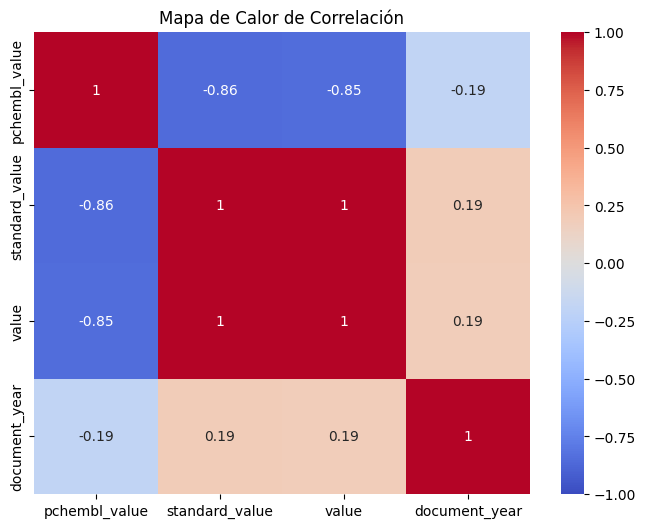

In [9]:
# Lista de columnas numéricas
col_num = ['pchembl_value', 'standard_value', 'value', 'document_year']

# Calcular la matriz de correlación
correlation_matrix = df_all[col_num].corr(numeric_only=True, method='pearson')

# Mostrar la matriz de correlación
print("Matriz de Correlación:")
print(correlation_matrix)

# Crear un mapa de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlación')
plt.show()

**Conclusión de Filtrado de características.**

De las anteriores columnas numéricas, sólo tomaremos en cuenta el standard value. En una próxima iteración consideraremos pchembl_value.



---


### Operaciones sobre características
#### Generación, Escalamiento y Transformación de columnas

Las columnas (molecule_chembl_id,canonical_smiles,standard_value) y bioactivity_class se combinarán en un solo DataFrame.

A continuación la descripción de nuestras columnas seleccionadas.

* **molecule_chembl_id**: Esta columna contiene identificadores únicos para las moléculas en el conjunto de datos. Es crucial si estás trabajando con un conjunto de datos que involucra múltiples moléculas y necesitas distinguirlas y realizar operaciones específicas basadas en su identificación.

* **canonical_smiles**: El SMILES canónico es una representación única y estandarizada de la estructura química de una molécula. Esta columna es importante cuando se realizan análisis químicos o comparacion de estructuras moleculares entre diferentes moléculas dentro del conjunto de datos.

* **standard_value**: Esta columna contiene valores numéricos que representan medidas estándar asociadas con las moléculas, como la actividad biológica de un compuesto (por ejemplo, la concentración inhibidora 50 (IC50) en ensayos biológicos). Es una columna crucial si estás interesado en analizar la actividad biológica de las moléculas o realizar comparaciones cuantitativas entre ellas.

Al seleccionar estas columnas específicas, estamos enfocando tu análisis en la identificación de las moléculas, sus estructuras químicas y las medidas estándar asociadas con su actividad biológica.

La Bioactividad será calculada/etiquetada en los siguientes pasos a través de un umbral.

In [10]:
ruta_archivo = '/content/drive/My Drive/Colab Notebooks/data/bioactivity_data_preprocessed.csv'

# Lee el archivo CSV en un DataFrame
df = pd.read_csv(ruta_archivo)

# Mostrar que se haya importado correctamente el archivo
df.head(10)

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL2022564,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,0.32
1,CHEMBL3234200,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,0.30
2,CHEMBL3234201,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,0.47
3,CHEMBL3234202,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,0.12
4,CHEMBL3649592,CC1CCC(NCc2ccn(Cc3ccccc3)c(=O)c2O)CC1,27400.00
5,CHEMBL3649593,O=c1c(O)c(CNCCCn2ccnc2)ccn1Cc1ccccc1,42500.00
6,CHEMBL3649594,CC(NCc1ccn(Cc2ccccc2)c(=O)c1O)c1ccccc1,20600.00
7,CHEMBL3674747,COC[C@H]1CCCN1Cc1ccn(Cc2ccccc2)c(=O)c1O,53000.00
8,CHEMBL3649595,CSCCNCc1ccn(Cc2ccccc2)c(=O)c1O,53000.00
9,CHEMBL3649596,O=c1c(O)c(CN2CCN(c3ccc(Cl)nn3)CC2)ccn1Cc1ccccc1,78000.00


In [11]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df2 = df[selection]

df2.head(10)

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL2022564,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,0.32
1,CHEMBL3234200,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,0.30
2,CHEMBL3234201,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,0.47
3,CHEMBL3234202,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,0.12
4,CHEMBL3649592,CC1CCC(NCc2ccn(Cc3ccccc3)c(=O)c2O)CC1,27400.00
5,CHEMBL3649593,O=c1c(O)c(CNCCCn2ccnc2)ccn1Cc1ccccc1,42500.00
6,CHEMBL3649594,CC(NCc1ccn(Cc2ccccc2)c(=O)c1O)c1ccccc1,20600.00
7,CHEMBL3674747,COC[C@H]1CCCN1Cc1ccn(Cc2ccccc2)c(=O)c1O,53000.00
8,CHEMBL3649595,CSCCNCc1ccn(Cc2ccccc2)c(=O)c1O,53000.00
9,CHEMBL3649596,O=c1c(O)c(CN2CCN(c3ccc(Cl)nn3)CC2)ccn1Cc1ccccc1,78000.00


#### Etiquetado de componentes
Los datos de bioactividad estan en la unidad IC50. Compuestos con menos de 1000 nM será considerados como **activos** mientras aquellos que sean mayores a 10,000 nM serán considerados como **inactivos**. Todos los valores que caen dentro de 1,000 y 10,000 nM serán clasificados como **intermedios**.

In [12]:
bioactivity_threshold = []
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [13]:
# Concatenar lista generada como una serie de pandas y agregarla al df
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df3 = pd.concat([df2, bioactivity_class], axis=1)


df3.head(10)

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL2022564,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,0.32,active
1,CHEMBL3234200,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,0.30,active
2,CHEMBL3234201,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,0.47,active
3,CHEMBL3234202,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,0.12,active
4,CHEMBL3649592,CC1CCC(NCc2ccn(Cc3ccccc3)c(=O)c2O)CC1,27400.00,inactive
5,CHEMBL3649593,O=c1c(O)c(CNCCCn2ccnc2)ccn1Cc1ccccc1,42500.00,inactive
6,CHEMBL3649594,CC(NCc1ccn(Cc2ccccc2)c(=O)c1O)c1ccccc1,20600.00,inactive
7,CHEMBL3674747,COC[C@H]1CCCN1Cc1ccn(Cc2ccccc2)c(=O)c1O,53000.00,inactive
8,CHEMBL3649595,CSCCNCc1ccn(Cc2ccccc2)c(=O)c1O,53000.00,inactive
9,CHEMBL3649596,O=c1c(O)c(CN2CCN(c3ccc(Cl)nn3)CC2)ccn1Cc1ccccc1,78000.00,inactive


#### Calcular descriptores Lipinski

##### Regla de Lipinski


La regla de Lipinski establece los siguientes criterios para evaluar la idoneidad de una molécula como candidato a fármaco:

1. **Peso molecular (MW):** MW < 500
2. **LogP (coeficiente de partición octanol-agua):** LogP < 5
3. **Número de donantes de hidrógeno (HBD):** HBD < 5
4. **Número de aceptores de hidrógeno (HBA):** HBA < 10

In [14]:
def lipinski(smiles, verbose=False):
    """
    Calcula los descriptores de Lipinski para una lista de cadenas SMILES.

    Parámetros:
    - smiles (list): Lista de cadenas SMILES para moléculas.
    - verbose (bool): Si es Verdadero, muestra la salida detallada.

    Retorna:
    - descriptors (DataFrame): DataFrame que contiene los descriptores de Lipinski.
    """

    # Crear una lista para almacenar las moléculas convertidas desde SMILES
    moldata = []
    for element in smiles:
        mol = Chem.MolFromSmiles(element)
        moldata.append(mol)

    # Inicializar un array de datos base para los descriptores
    baseData = np.arange(1, 1)
    i = 0
    for mol in moldata:
        # Calcular los descriptores de Lipinski para cada molécula
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumAcceptors = Lipinski.NumHAcceptors(mol)

        # Almacenar los descriptores en un array de fila
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumAcceptors])

        # Agregar la fila al array baseData
        if i == 0:
            baseData = row
        else:
            baseData = np.vstack([baseData, row])
        i = i + 1

    # Crear un DataFrame con nombres de columna
    columnNames = ['MW', 'LogP', 'NumHDonors', 'NumHAcceptors']
    descriptors = pd.DataFrame(data=baseData, columns=columnNames)

    return descriptors

In [15]:
# Llamado de la funcion lipsinki
df_lipinski = lipinski(df3.canonical_smiles)

#### Combinar DataFrames

In [16]:
# Visualizar el dataframe con los descriptores calculados
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,828.130,5.1124,2.0,10.0
1,814.103,4.8664,2.0,10.0
2,842.157,5.5025,2.0,10.0
3,828.130,5.1124,2.0,10.0
4,326.440,3.2705,2.0,4.0
...,...,...,...,...
10630,446.555,4.0263,2.0,8.0
10631,514.674,5.7260,2.0,8.0
10632,579.749,5.3221,2.0,8.0
10633,624.790,5.2330,2.0,9.0


In [17]:
combined_df = pd.concat([df3, df_lipinski], axis=1)
combined_df.head(10)

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL2022564,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,0.32,active,828.130,5.1124,2.0,10.0
1,CHEMBL3234200,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,0.30,active,814.103,4.8664,2.0,10.0
2,CHEMBL3234201,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,0.47,active,842.157,5.5025,2.0,10.0
3,CHEMBL3234202,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,0.12,active,828.130,5.1124,2.0,10.0
4,CHEMBL3649592,CC1CCC(NCc2ccn(Cc3ccccc3)c(=O)c2O)CC1,27400.00,inactive,326.440,3.2705,2.0,4.0
5,CHEMBL3649593,O=c1c(O)c(CNCCCn2ccnc2)ccn1Cc1ccccc1,42500.00,inactive,338.411,1.9786,2.0,6.0
6,CHEMBL3649594,CC(NCc1ccn(Cc2ccccc2)c(=O)c1O)c1ccccc1,20600.00,inactive,334.419,3.4530,2.0,4.0
7,CHEMBL3674747,COC[C@H]1CCCN1Cc1ccn(Cc2ccccc2)c(=O)c1O,53000.00,inactive,328.412,2.2130,1.0,5.0
8,CHEMBL3649595,CSCCNCc1ccn(Cc2ccccc2)c(=O)c1O,53000.00,inactive,304.415,2.0548,2.0,5.0
9,CHEMBL3649596,O=c1c(O)c(CN2CCN(c3ccc(Cl)nn3)CC2)ccn1Cc1ccccc1,78000.00,inactive,411.893,2.3678,1.0,7.0


#### Convertir IC50 a pIC50

Para contar con datos más uniformes, se convirtió **IC50** a su escala logaritmica negativa, lo cual esencialemnte es ${-\log_{10}(IC_{50})}$

Se definió una función **pIC50** la cual aceptará un dataframe como entrada y hará lo siguiente:

* Tomar los valores de IC50 de la columna **standard_value** y los convertirá de nM a M mediante la multiplicación del valor por ${10^{-9}}$.
* Tomar el valor molar y aplicar ${-\log_{10}}$
* Borrar la columna de **standard_value** y crear una nueva columna llamada **pIC50**.

In [18]:
def pIC50(input):
  pIC50 = []
  for i in input['standard_value_norm']:
    molar = i*(10**-9) # Convierte nM a M
    pIC50.append(-np.log10(molar))

  input['pIC50'] = pIC50
  x = input.drop(columns='standard_value_norm')
  return x

Los valores mayores a 100,000,000 se quedarán en 100,000,000, de no hacerlo así los valores logaritmicos negativos se convertirán en negativos.

In [19]:
combined_df.standard_value.describe()

count    1.063500e+04
mean     1.127840e+04
std      6.718791e+04
min      2.300000e-02
25%      4.000000e+01
50%      3.700000e+02
75%      4.200500e+03
max      4.081000e+06
Name: standard_value, dtype: float64

En este caso no es necesario pero se debe implementar esa lógica para evitar cualquier tipo de problema en el futuro.

In [20]:
def norm_value(input):
    # lista para guardar valores normalizados
    norm = []

    for i in input['standard_value']:
        # valores mayores a 100000000 se quedan en 100000000
        if i > 100000000:
          i = 100000000
        # agregarlos a la lista
        norm.append(i)

    # nueva columna con valores estándar normalizados
    input['standard_value_norm'] = norm
    # eliminar columna con los datos sin normalizar
    x = input.drop(columns='standard_value')

    return x

Primero aplicaremos la función norm_value para que los valores dentro de la columna standard_value sean normalizados.

In [21]:
df_norm = norm_value(combined_df)
df_norm.head(5)

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL2022564,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,active,828.130,5.1124,2.0,10.0,0.32
1,CHEMBL3234200,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,active,814.103,4.8664,2.0,10.0,0.30
2,CHEMBL3234201,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,active,842.157,5.5025,2.0,10.0,0.47
3,CHEMBL3234202,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,active,828.130,5.1124,2.0,10.0,0.12
4,CHEMBL3649592,CC1CCC(NCc2ccn(Cc3ccccc3)c(=O)c2O)CC1,inactive,326.440,3.2705,2.0,4.0,27400.00


El siguiente paso es convertir la columna IC50 a pIC50

In [22]:
df_plc50 = pIC50(df_norm)
df_plc50.head(10)

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL2022564,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,active,828.130,5.1124,2.0,10.0,9.494850
1,CHEMBL3234200,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,active,814.103,4.8664,2.0,10.0,9.522879
2,CHEMBL3234201,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,active,842.157,5.5025,2.0,10.0,9.327902
3,CHEMBL3234202,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,active,828.130,5.1124,2.0,10.0,9.920819
4,CHEMBL3649592,CC1CCC(NCc2ccn(Cc3ccccc3)c(=O)c2O)CC1,inactive,326.440,3.2705,2.0,4.0,4.562249
5,CHEMBL3649593,O=c1c(O)c(CNCCCn2ccnc2)ccn1Cc1ccccc1,inactive,338.411,1.9786,2.0,6.0,4.371611
6,CHEMBL3649594,CC(NCc1ccn(Cc2ccccc2)c(=O)c1O)c1ccccc1,inactive,334.419,3.4530,2.0,4.0,4.686133
7,CHEMBL3674747,COC[C@H]1CCCN1Cc1ccn(Cc2ccccc2)c(=O)c1O,inactive,328.412,2.2130,1.0,5.0,4.275724
8,CHEMBL3649595,CSCCNCc1ccn(Cc2ccccc2)c(=O)c1O,inactive,304.415,2.0548,2.0,5.0,4.275724
9,CHEMBL3649596,O=c1c(O)c(CN2CCN(c3ccc(Cl)nn3)CC2)ccn1Cc1ccccc1,inactive,411.893,2.3678,1.0,7.0,4.107905


In [23]:
df_plc50.pIC50.describe()

count    10635.000000
mean         6.426244
std          1.278506
min          2.389233
25%          5.376699
50%          6.431798
75%          7.397940
max         10.638272
Name: pIC50, dtype: float64

#### Eliminar la clase bioactiva intermedia

Cuando eliminamos una clase bioactiva intermedia durante el análisis de datos del CHEMBL para la proteína VEGF165, estamos simplificando el análisis, enfoncanonos en resultados relevantes, optimizamos recursos y mejoramos la precisión de los resultados obtenidos.

In [24]:
df_plc50_two_classes = df_plc50[df_plc50['class'] != 'intermediate']
df_plc50_two_classes.head(10)

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL2022564,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,active,828.130,5.1124,2.0,10.0,9.494850
1,CHEMBL3234200,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,active,814.103,4.8664,2.0,10.0,9.522879
2,CHEMBL3234201,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,active,842.157,5.5025,2.0,10.0,9.327902
3,CHEMBL3234202,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,active,828.130,5.1124,2.0,10.0,9.920819
4,CHEMBL3649592,CC1CCC(NCc2ccn(Cc3ccccc3)c(=O)c2O)CC1,inactive,326.440,3.2705,2.0,4.0,4.562249
5,CHEMBL3649593,O=c1c(O)c(CNCCCn2ccnc2)ccn1Cc1ccccc1,inactive,338.411,1.9786,2.0,6.0,4.371611
6,CHEMBL3649594,CC(NCc1ccn(Cc2ccccc2)c(=O)c1O)c1ccccc1,inactive,334.419,3.4530,2.0,4.0,4.686133
7,CHEMBL3674747,COC[C@H]1CCCN1Cc1ccn(Cc2ccccc2)c(=O)c1O,inactive,328.412,2.2130,1.0,5.0,4.275724
8,CHEMBL3649595,CSCCNCc1ccn(Cc2ccccc2)c(=O)c1O,inactive,304.415,2.0548,2.0,5.0,4.275724
9,CHEMBL3649596,O=c1c(O)c(CN2CCN(c3ccc(Cl)nn3)CC2)ccn1Cc1ccccc1,inactive,411.893,2.3678,1.0,7.0,4.107905


Convertir la columna class en binaria numérica.

In [25]:
# Reemplazar "active" por 1 y "inactive" por 0
df_plc50_two_classes.loc[:, 'class'] = df_plc50_two_classes['class'].replace({'active': 1, 'inactive': 0})
df_plc50_two_classes.head(10)

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL2022564,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,1,828.130,5.1124,2.0,10.0,9.494850
1,CHEMBL3234200,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,1,814.103,4.8664,2.0,10.0,9.522879
2,CHEMBL3234201,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,1,842.157,5.5025,2.0,10.0,9.327902
3,CHEMBL3234202,CC[C@H](C)[C@H]1C(=O)N2CCC[C@H]2C(=O)O[C@H](C(...,1,828.130,5.1124,2.0,10.0,9.920819
4,CHEMBL3649592,CC1CCC(NCc2ccn(Cc3ccccc3)c(=O)c2O)CC1,0,326.440,3.2705,2.0,4.0,4.562249
5,CHEMBL3649593,O=c1c(O)c(CNCCCn2ccnc2)ccn1Cc1ccccc1,0,338.411,1.9786,2.0,6.0,4.371611
6,CHEMBL3649594,CC(NCc1ccn(Cc2ccccc2)c(=O)c1O)c1ccccc1,0,334.419,3.4530,2.0,4.0,4.686133
7,CHEMBL3674747,COC[C@H]1CCCN1Cc1ccn(Cc2ccccc2)c(=O)c1O,0,328.412,2.2130,1.0,5.0,4.275724
8,CHEMBL3649595,CSCCNCc1ccn(Cc2ccccc2)c(=O)c1O,0,304.415,2.0548,2.0,5.0,4.275724
9,CHEMBL3649596,O=c1c(O)c(CN2CCN(c3ccc(Cl)nn3)CC2)ccn1Cc1ccccc1,0,411.893,2.3678,1.0,7.0,4.107905


Eliminar outliers del dataset

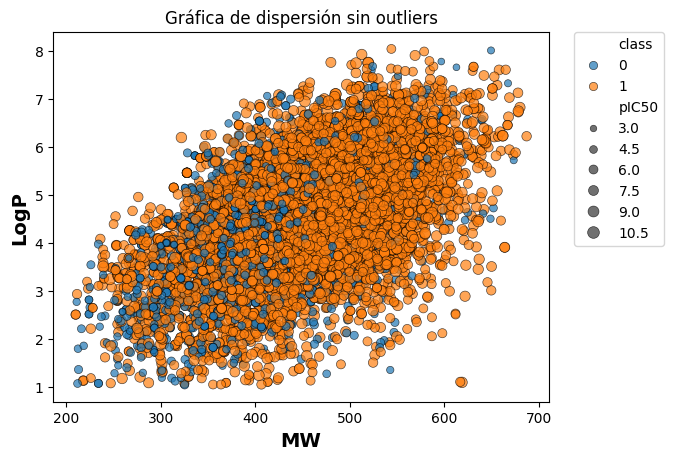

In [26]:
# Eliminar outliers usando el IQR
def remove_outliers(df,column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return df[(df[column] >= lower_bound) & (df [column] <= upper_bound) ]

# Eliminar outliers en las columnas 'MW' y 'LogP'
df_plc50_two_classes = remove_outliers(df_plc50_two_classes, 'MW')
df_plc50_two_classes = remove_outliers(df_plc50_two_classes, 'LogP')

# Crear la gráfica de dispersión con los datos filtrados plt. figure (figsize=(5.5, 5.5))
sns. scatterplot(x='MW', y='LogP', data=df_plc50_two_classes, hue='class', size='pIC50', edgecolor='black', alpha=0.7)
plt.xlabel ( 'MW', fontsize=14, fontweight='bold')
plt.ylabel( 'LogP', fontsize=14, fontweight='bold')
plt. legend (bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt. title( 'Gráfica de dispersión sin outliers')
plt.savefig('/content/drive/My Drive/Colab Notebooks/data/plot_MW_vs_LogP_filtered.pdf')
plt.show()

Estandarizar valor de las columnas

In [27]:
# Verificar el rango del valor

valores_maximos = df_plc50_two_classes.max()
valores_minimos = df_plc50_two_classes.min()
# Imprimir los valores máximo y mínimo de cada columna
for columna in df_plc50_two_classes.columns:
    if pd.api.types.is_numeric_dtype(df_plc50_two_classes[columna]):  # Verificar si la columna es numérica
        print(f"Columna '{columna}':")
        print("  Valor máximo:", valores_maximos[columna])
        print("  Valor mínimo:", valores_minimos[columna])

Columna 'MW':
  Valor máximo: 686.8100000000001
  Valor mínimo: 210.236
Columna 'LogP':
  Valor máximo: 8.044700000000004
  Valor mínimo: 1.0415999999999996
Columna 'NumHDonors':
  Valor máximo: 8.0
  Valor mínimo: 0.0
Columna 'NumHAcceptors':
  Valor máximo: 14.0
  Valor mínimo: 1.0
Columna 'pIC50':
  Valor máximo: 10.638272163982407
  Valor mínimo: 2.389233405226729


In [28]:
df_standar = df_plc50_two_classes.copy()

In [29]:
# Seleccionar las columnas que deseas estandarizar
columnas_numericas = ['MW', 'LogP', 'NumHDonors', 'NumHAcceptors', 'pIC50']

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Aplicar la estandarización a las columnas seleccionadas
df_standar[columnas_numericas] = scaler.fit_transform(df_standar[columnas_numericas])

In [30]:
# Verificar el rango del valor
valores_maximos = df_standar.max()
valores_minimos = df_standar.min()
# Imprimir los valores máximo y mínimo de cada columna
for columna in df_standar.columns:
    if pd.api.types.is_numeric_dtype(df_standar[columna]):  # Verificar si la columna es numérica
        print(f"Columna '{columna}':")
        print("  Valor máximo:", valores_maximos[columna])
        print("  Valor mínimo:", valores_minimos[columna])

Columna 'MW':
  Valor máximo: 2.929478418879109
  Valor mínimo: -2.8470822941755665
Columna 'LogP':
  Valor máximo: 2.8460796880864954
  Valor mínimo: -2.798846764713458
Columna 'NumHDonors':
  Valor máximo: 5.432147171767892
  Valor mínimo: -1.9931688524564357
Columna 'NumHAcceptors':
  Valor máximo: 4.375046800193085
  Valor mínimo: -2.7293686337469465
Columna 'pIC50':
  Valor máximo: 3.0360959195777215
  Valor mínimo: -3.259502036827589


Transformar columna Canonical Smile

In [31]:
df_canonical_rep = df_standar.copy()

In [32]:
selection = ['canonical_smiles','molecule_chembl_id']
df_selection = df_plc50_two_classes[selection]
df_selection.to_csv('/content/drive/My Drive/Colab Notebooks/data/molecule.smi', sep='\t', index=False, header=False)
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [33]:
! cat '/content/drive/My Drive/Colab Notebooks/data/molecule.smi' | head -5

CC1CCC(NCc2ccn(Cc3ccccc3)c(=O)c2O)CC1	CHEMBL3649592
O=c1c(O)c(CNCCCn2ccnc2)ccn1Cc1ccccc1	CHEMBL3649593
CC(NCc1ccn(Cc2ccccc2)c(=O)c1O)c1ccccc1	CHEMBL3649594
COC[C@H]1CCCN1Cc1ccn(Cc2ccccc2)c(=O)c1O	CHEMBL3674747
CSCCNCc1ccn(Cc2ccccc2)c(=O)c1O	CHEMBL3649595


In [34]:
! cat '/content/drive/My Drive/Colab Notebooks/data/molecule.smi' | wc -l

8465


#### Cálculo de descriptores

Ahora que tenemos las moléculas separadas, nos corresponde hacer la transformación de los datos. Si bien, las computadoras están capacitadas para entrenar modelos gracias a valores numéricos, en esta ocasión tendremos que hacer un proceso de transformación para poder descomponer las cadenas que conforman las moléculas. Dicho proceso se asemeja al que se realiza para el Procesamiento del Lenguaje Natural (Word Embedding), en donde una palabra toma un valor numérico a través de vectores. Algo similar ocurre en el proceso del cálculo de descriptores moleculares. Necesitamos descomponer la información para que esto pueda ser interpretado por la computadora en el proceso de aprendizaje. Para ello usaremos los fingerprint moleculares.

**Los fingerprints moleculares son representaciones binarias** que codifican la presencia o ausencia de características estructurales específicas en una molécula. Imaginemos que cada molécula tiene una "huella dactilar" única basada en su estructura. Esta "huella" se representa como una serie de bits, donde "1" indica la presencia de una característica y "0" su ausencia.

*¿Cómo se usan en el análisis de bioactividad?*

* **Comparación**: Los fingerprints permiten comparar rápidamente la similitud estructural entre moléculas. Si dos moléculas tienen fingerprints similares, es probable que también compartan propiedades biológicas.

* **Predicción**: Los fingerprints se utilizan como variables en modelos de aprendizaje automático para predecir la actividad biológica de nuevas moléculas. Al entrenar un modelo con datos de moléculas conocidas, podemos predecir la actividad de moléculas desconocidas basándonos en sus fingerprints.

* **Búsqueda de moléculas similares**: Los fingerprints facilitan la búsqueda de moléculas similares en grandes bases de datos. Esto es útil para identificar compuestos con potencial terapéutico similar al de una molécula de referencia.

Un grupo de investigadores ha desarollado un software de código abierto capaz de generar fingerprints moleculares a través de diferentes parámetros que también se usan a nivel químico para la descomposición de dichas moleculas.

Dicho sofware lleva por nombre: **PaDEL - Descriptor**. Esta herramienta se ha convertido en una aplicación ampliamente usada para la descomposición de moleculas a nivel binario. La información de este software se encuentra en la sección de referencias de este Notebook.

Para comprender mejor cómo PaDEL-Descriptor genera fingerprints moleculares, exploraremos el concepto de binarización de moléculas. Aunque no utilizaremos esta función en nuestro análisis final, el siguiente código en Python nos permitirá visualizar de manera simplificada cómo se representan las características estructurales de una molécula en un formato binario, similar a lo que hace PaDEL.

Es importante destacar que este ejemplo es una simplificación del proceso real llevado a cabo por PaDEL, el cual involucra una gama mucho más amplia de descriptores y algoritmos de complejidad superior. Sin embargo, este ejercicio nos ayudará a comprender los principios básicos de la generación de fingerprints y su utilidad en el análisis de bioactividad.

A continuación, presentamos el código en Python que ejemplifica la binarización de moléculas para generar fingerprints.


In [35]:
# Función para estimar los descriptores de huellas dactilares
def calculate_pubchem_fingerprints(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)  # Morgan fingerprint, radius=2, nBits=2048
    return fp

# Leer el archivo molecule.smi y calcular los descriptores de huellas dactilares
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/molecule.smi", sep="\t", header=None, names=["SMILES", "ID"])

# Eliminar las sales y normalizar los nitros utilizando RDKit
data["SMILES"] = data["SMILES"].apply(Chem.MolFromSmiles)
data["SMILES"] = data["SMILES"].apply(Chem.RemoveHs)
data["SMILES"] = data["SMILES"].apply(Chem.MolToSmiles)

fingerprints = []
for smiles in data["SMILES"]:
    fp = calculate_pubchem_fingerprints(smiles)
    if fp is not None:
        # Convertir el objeto ExplicitBitVect a una lista de enteros
        arr = [int(x) for x in fp.ToBitString()]
        fingerprints.append(arr)

# Convertir los descriptores de huellas dactilares en un DataFrame de pandas
fingerprints_df = pd.DataFrame(fingerprints)
fingerprints_df.columns = [f"PubchemFP{i}" for i in range(len(fingerprints_df.columns))]
fingerprints_df.insert(0, "Name", data["ID"])

# Guardar los descriptores de huellas dactilares en un archivo CSV
fingerprints_df.to_csv('/content/drive/My Drive/Colab Notebooks/data/descriptors_output.csv', index=False)

In [36]:
fingerprints_df

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP2038,PubchemFP2039,PubchemFP2040,PubchemFP2041,PubchemFP2042,PubchemFP2043,PubchemFP2044,PubchemFP2045,PubchemFP2046,PubchemFP2047
0,CHEMBL3649592,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL3649593,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL3649594,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL3674747,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL3649595,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8460,CHEMBL2332843,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8461,CHEMBL2332842,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8462,CHEMBL2332841,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8463,CHEMBL4644274,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


En este notebook, se ha optado por utilizar PaDEL-Descriptor para la generación de descriptores moleculares, en lugar de implementar algoritmos propios en Python. Esta decisión se basa en las siguientes razones:

1. **Amplitud y Validación de Descriptores**: PaDEL-Descriptor ofrece una colección extensa de más de 1875 descriptores, cubriendo una amplia gama de propiedades moleculares relevantes para estudios de bioactividad, incluyendo descriptores 1D, 2D y fingerprints. Estos descriptores han sido ampliamente validados y utilizados en la literatura científica, asegurando la solidez y confiabilidad de nuestro análisis.
2. **Eficiencia y Rendimiento**: PaDEL-Descriptor está implementado en Java, un lenguaje conocido por su eficiencia en el manejo de grandes conjuntos de datos. Además, PaDEL está optimizado para el cálculo paralelo de descriptores, lo que acelera significativamente el proceso de generación de datos. Implementar una cantidad similar de algoritmos en Python, aunque posible, resultaría en un mayor tiempo de desarrollo y ejecución, impactando negativamente la eficiencia del proyecto.
3. **Facilidad de Uso e Integración**: PaDEL-Descriptor proporciona una interfaz de línea de comandos sencilla e intuitiva, permitiendo una fácil integración con scripts de Python. La opción de utilizar archivos XML para configurar la generación de descriptores ofrece un alto grado de flexibilidad y control sobre el proceso. Desarrollar un sistema equivalente en Python requeriría un esfuerzo significativo en la creación de interfaces y gestión de dependencias.
4. **Soporte y Comunidad**: PaDEL-Descriptor es una herramienta de código abierto con una comunidad activa de usuarios y desarrolladores. Esto garantiza un soporte continuo, actualizaciones regulares y la posibilidad de resolver dudas o problemas que puedan surgir durante el desarrollo del proyecto.
5. **Replicabilidad e Interoperabilidad**: El uso de una herramienta establecida como PaDEL-Descriptor facilita la reproducibilidad de nuestro estudio. Otros investigadores podrán replicar nuestro análisis utilizando la misma herramienta y configuración, contribuyendo a la validación de nuestros resultados. Además, la salida de PaDEL se integra fácilmente con otras herramientas de análisis de datos y aprendizaje automático, favoreciendo la interoperabilidad y el flujo de trabajo.

La elección de PaDEL-Descriptor se justifica por su amplitud de descriptores, eficiencia computacional, facilidad de uso, fuerte comunidad y capacidad de integración. El uso de esta herramienta nos permite enfocar nuestros esfuerzos en el análisis de datos y el desarrollo de modelos, optimizando el tiempo y los recursos del proyecto, sin comprometer la calidad y la reproducibilidad del estudio.

#### Cálculo de descriptores con PaDEL

In [37]:
# Descarga de PaDEL - Descriptor sin Output en consola
%%capture
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

!cp "padel.zip" "/content/drive/My Drive/Colab Notebooks/data/padel.zip"
!cp "padel.sh" "/content/drive/My Drive/Colab Notebooks/data/padel.sh"

!cp "/content/drive/My Drive/Colab Notebooks/data/padel.zip" "padel.zip"
!cp "/content/drive/My Drive/Colab Notebooks/data/padel.sh" "padel.sh"

In [38]:
# Descomprimimos padel sin Output en consola
%%capture
! unzip padel.zip

In [39]:
# Inspeccionamos el script de PaDEL que nos ayudará a generar los descriptores
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [40]:
# Calculamos los descriptores con PaDEL sin Output en consola
%%capture
! bash padel.sh

In [41]:
# Guardamos el output como csv
!cp "descriptors_output.csv" "/content/drive/My Drive/Colab Notebooks/data/descriptors_output.csv"

In [42]:
# Mostrar descriptores calculados con Padel
fingerprints_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/descriptors_output.csv')
fingerprints_df

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL3649593,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL3649592,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL3674747,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL3649594,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL3649595,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8460,CHEMBL2332842,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8461,CHEMBL2332843,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8462,CHEMBL2332841,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8463,CHEMBL4644274,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# Dado que nos interesa agregar el pIC50 a nuestra tabla de descriptores resulta util unirlas por medio de su id
columns = ['molecule_chembl_id','pIC50']
pIC50_df = df_plc50_two_classes[columns]

In [44]:
# Unir tabla con descriptores junto con la tabla con su pIC50 mediante el molecule_chembl_id
df_pubchem_fp_pic = pd.merge(fingerprints_df, pIC50_df, left_on='Name', right_on='molecule_chembl_id', how='inner')
# Eliminar columna repetida
df_pubchem_fp_pic = df_pubchem_fp_pic.drop('molecule_chembl_id', axis=1)
df_pubchem_fp_pic

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,CHEMBL3649593,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.371611
1,CHEMBL3649592,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.562249
2,CHEMBL3674747,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.275724
3,CHEMBL3649594,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.686133
4,CHEMBL3649595,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.275724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8460,CHEMBL2332842,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.000000
8461,CHEMBL2332843,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.000000
8462,CHEMBL2332841,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.000000
8463,CHEMBL4644274,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.004365


In [45]:
# Verficar que no existen valores nan
sum(df_pubchem_fp_pic.pIC50.isna())

0

#### Preparar Matrices de datos de X y Y

##### Matriz de datos X

In [46]:
# Para un dataframe de datos en X, cargamos los descriptor outputs recién calculados con PaDEL
df2_X = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/descriptors_output.csv')

In [47]:
df2_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL3649593,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL3649592,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL3674747,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL3649594,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL3649595,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8460,CHEMBL2332842,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8461,CHEMBL2332843,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8462,CHEMBL2332841,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8463,CHEMBL4644274,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# Eliminamos la columna Name ya que no es dato relevante
df2_X = df2_X.drop(columns=['Name'])
df2_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8460,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8461,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8462,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8463,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


##### Variable Y

**Guardar valores de pIC50 en nuestra variable Y**

In [49]:
df2_Y = df_pubchem_fp_pic['pIC50']

In [50]:
# Concatenar X con Y
dataset = pd.concat([df2_X,df2_Y], axis=1)
dataset.head(10)

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.371611
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.562249
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.275724
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.686133
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.275724
5,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.107905
6,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.201349
7,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.899629
8,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.534617
9,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.568636


In [51]:
# Verficar pIC50 sin valores nan
sum(dataset.pIC50.isna())

0

In [52]:
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.371611
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.562249
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.275724
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.686133
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.275724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8460,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
8461,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
8462,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
8463,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.004365


Guardar el dataset para posteriormente realizar el modelo de aprendizaje supervisado

In [53]:
dataset.to_csv('/content/drive/My Drive/Colab Notebooks/data/bioactivity_data_2class_pIC50_pubchem_fp.csv', index=False)

Guardar en un archivo .zip los archivos generados

In [54]:
# Guardar archivos en un archivo zip
! zip -r /content/drive/My\ Drive/Colab\ Notebooks/data/results.zip /content/drive/My\ Drive/Colab\ Notebooks/data


updating: content/drive/My Drive/Colab Notebooks/data/plot_bioactivity_class.pdf (deflated 38%)
updating: content/drive/My Drive/Colab Notebooks/data/plot_ic50.pdf (deflated 37%)
updating: content/drive/My Drive/Colab Notebooks/data/plot_LogP.pdf (deflated 37%)
updating: content/drive/My Drive/Colab Notebooks/data/plot_MW.pdf (deflated 38%)
updating: content/drive/My Drive/Colab Notebooks/data/plot_MW_vs_LogP.pdf (deflated 1%)
updating: content/drive/My Drive/Colab Notebooks/data/plot_NumHAcceptors.pdf (deflated 39%)
updating: content/drive/My Drive/Colab Notebooks/data/plot_NumHDonors.pdf (deflated 39%)
updating: content/drive/My Drive/Colab Notebooks/data/bioactivity_data_2class_pIC50.csv (deflated 78%)
updating: content/drive/My Drive/Colab Notebooks/data/bioactivity_data.csv (deflated 92%)
updating: content/drive/My Drive/Colab Notebooks/data/bioactivity_data_curated.csv (deflated 83%)
updating: content/drive/My Drive/Colab Notebooks/data/bioactivity_data_preprocessed.csv (deflated

In [55]:
# Verificar cambios
! ls '/content/drive/My Drive/Colab Notebooks/data/'

bioactivity_data_2class_pIC50.csv	      molecule.smi
bioactivity_data_2class_pIC50_pubchem_fp.csv  padel.sh
bioactivity_data_3class_pIC50_pubchem_fp.csv  padel.zip
bioactivity_data_clean.csv		      plot_bioactivity_class.pdf
bioactivity_data.csv			      plot_ic50.pdf
bioactivity_data_curated.csv		      plot_LogP.pdf
bioactivity_data_preprocessed.csv	      plot_MW.pdf
descriptors_output.csv			      plot_MW_vs_LogP_filtered.pdf
mannwhitneyu_LogP.csv			      plot_MW_vs_LogP.pdf
mannwhitneyu_MW.csv			      plot_NumHAcceptors.pdf
mannwhitneyu_NumHAcceptors.csv		      plot_NumHDonors.pdf
mannwhitneyu_NumHDonors.csv		      results.zip
mannwhitneyu_pIC50.csv




---


### Conclusiones de fase "Preparación de los datos"

En esta fase de Preparación de Datos del proyecto Diseño acelerado de Fármacos con uso de la metodología CRISP-ML para la predicción de la eficiencia de inhibición de VEGF165, hemos aplicado una serie de técnicas para transformar y preparar los datos obtenidos de la base de datos CHEMBL para su uso en el entrenamiento del modelo de IA.

*Principales hallazgos:*
1. **Umbral de varianza**: Se identificaron variables con varianza extremadamente baja. Estas variables aportan poca información y podrían ser eliminadas para simplificar el modelo.

2. **Correlación**: Se encontró correlación entre algunas variables numéricas, lo que indica redundancia en la información. La eliminación de variables altamente correlacionadas podría mejorar la eficiencia del modelo.

3. **Naturaleza de los datos**: Se confirmó que la variable 'canonical_smiles', crucial para el análisis, requiere un procesamiento especial para extraer información relevante de la estructura molecular.

*Acciones Realizadas:*

1. **Implementación de técnicas de Ingeniería de Características**: Se implementaron las técnicas de discretización, codificación, escalamiento y transformación sobre las variables seleccionadas, buscando optimizar la representación de los datos para el modelo de IA.

2. **Generación de fingerprints moleculares**: Se generaron fingerprints moleculares a partir de la variable 'canonical_smiles' para capturar información estructural relevante para la predicción de la inhibición de VEGF165.

*Próximos pasos:*

**Evaluación del impacto**: En la siguiente fase del proyecto, se evaluará el impacto de las transformaciones realizadas en el rendimiento del modelo de IA durante la fase de modelado.

*Observaciones:*

Es importante destacar que las decisiones tomadas en esta fase están sujetas a cambios en función del rendimiento del modelo en fases posteriores.
Se documentarán cuidadosamente todas las transformaciones realizadas para asegurar la reproducibilidad del proyecto.

La fase de Preparación de Datos ha sentado las bases para construir un modelo de IA robusto y preciso. La aplicación de las técnicas de Ingeniería de Características y la generación de fingerprints moleculares nos permitirá obtener una representación de los datos optimizada para la tarea de predicción de la eficiencia de inhibición de VEGF165.

#### Referencias

ap, C. W. (2011). PaDEL-descriptor: An open source software to calculate molecular descriptors and fingerprints. Journal of computational chemistry, 32(7), 1466–1474. https://doi.org/10.1002/jcc.21707